In [ ]:
import geopandas as gpd
from shapely.geometry import shape
import pandas as pd
import numpy as np
data= pd.read_csv('/home/idisc02/Downloads/chatgpt_novalue_built.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Site           300 non-null    object
 1   Road Networks  300 non-null    object
 2   Built Areas    300 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


In [ ]:

file_path = '/home/idisc02/Downloads/Built_area_without_value.xlsx'


df = pd.read_excel(file_path)


df.head()

,country,description_reported,host_name,planting_date_reported,project_id_reported,site_id_reported,site_sqkm,survival_rate_reported,trees_planted_reported,url,...,created_site_ids,created_project_ids,Nested_in,Intersecting_with,planting_year,avg_precip_planting_year,avg_precip_1_year_after,avg_precip_2_years_after,avg_precip_5_years_after,geometry
0,Rwanda,Gansu Longnan Afforestation Project (hereinaft...,Verra_Aggregated,2020-06-22,4488,3219,0.000355,NaN,NaN,https://registry.verra.org/mymodule/ProjectDoc...,...,reforest_site_138746,reforest_proj_569,NaN,NaN,2020,112.091666,100.666666,NaN,NaN,POLYGON ((29.927252276298145 -1.67832094098189...
1,Rwanda,Gansu Longnan Afforestation Project (hereinaft...,Verra_Aggregated,2020-06-22,4488,3222,0.000545,NaN,NaN,https://registry.verra.org/mymodule/ProjectDoc...,...,reforest_site_138749,reforest_proj_569,NaN,NaN,2020,112.091666,100.666666,NaN,NaN,POLYGON ((29.928924455558622 -1.68555805697985...
2,Rwanda,Gansu Longnan Afforestation Project (hereinaft...,Verra_Aggregated,2020-06-22,4488,3243,0.001256,NaN,NaN,https://registry.verra.org/mymodule/ProjectDoc...,...,reforest_site_138758,reforest_proj_569,NaN,NaN,2020,108.875000,98.449998,NaN,NaN,POLYGON ((29.99128945015462 -1.723050182261426...
3,Rwanda,Gansu Longnan Afforestation Project (hereinaft...,Verra_Aggregated,2020-06-22,4488,3244,0.000674,NaN,NaN,https://registry.verra.org/mymodule/ProjectDoc...,...,reforest_site_138759,reforest_proj_569,NaN,NaN,2020,112.275002,100.591665,NaN,NaN,POLYGON ((29.941846907617848 -1.66483660669508...
4,Rwanda,Gansu Longnan Afforestation Project (hereinaft...,Verra_Aggregated,2020-06-22,4488,3247,0.002447,NaN,NaN,https://registry.verra.org/mymodule/ProjectDoc...,...,reforest_site_138762,reforest_proj_569,NaN,"reforest_site_141233, reforest_site_145249, re...",2020,110.591668,99.399999,NaN,NaN,POLYGON ((29.954033627606947 -1.77614466876067...


In [ ]:


merged_df = pd.merge(data, df, left_on='Site', right_on='created_site_ids')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Site                              300 non-null    object        
 1   Road Networks                     300 non-null    object        
 2   Built Areas                       300 non-null    object        
 3   country                           300 non-null    object        
 4   description_reported              300 non-null    object        
 5   host_name                         300 non-null    object        
 6   planting_date_reported            300 non-null    datetime64[ns]
 7   project_id_reported               300 non-null    int64         
 8   site_id_reported                  300 non-null    int64         
 9   site_sqkm                         300 non-null    float64       
 10  survival_rate_reported            0 non-null      

In [ ]:
merged_df["Built_Area_visual"]

0      No
1      No
2      No
3      No
4      No
       ..
295    No
296    No
297    No
298    No
299    No
Name: Built_Area_visual, Length: 300, dtype: object

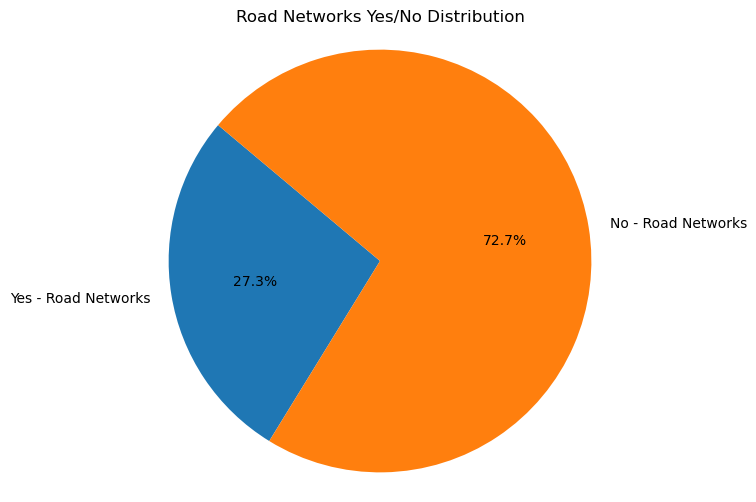

In [ ]:
import matplotlib.pyplot as plt

# Checking the Roadnetworks from physical and chatgpt
yes_count_Road_Networks = (merged_df['Road Networks'] == 'Yes').sum()
no_count_Road_Networks = (merged_df['Road Networks'] == 'No').sum()


plt.figure(figsize=(6, 6))
values_Road_Networks = [yes_count_Road_Networks, no_count_Road_Networks]
labels_Road_Networks = ['Yes - Road Networks', 'No - Road Networks']
plt.pie(values_Road_Networks, labels=labels_Road_Networks, autopct='%1.1f%%', startangle=140)
plt.title('Road Networks Yes/No Distribution')
plt.axis('equal')
plt.show()

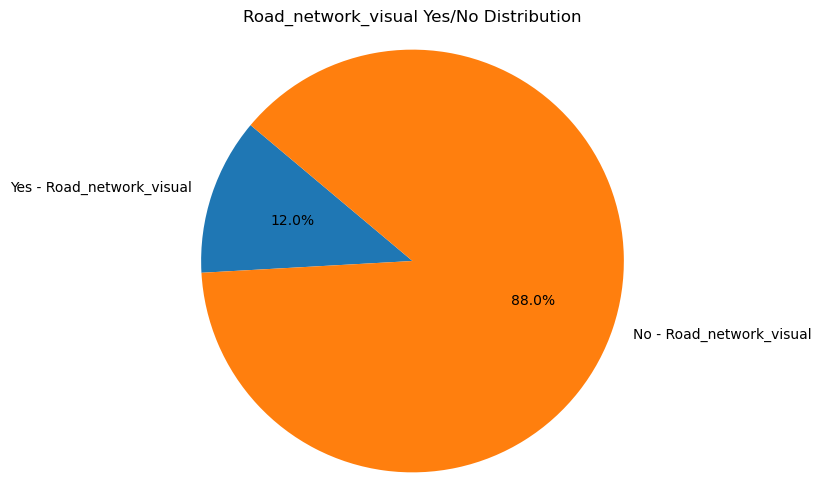

In [ ]:
import matplotlib.pyplot as plt

# Counts for "Road_network_visual"
yes_count_Road_network_visual = (merged_df['Road_network_visual'] == 'Yes').sum()
no_count_Road_network_visual = (merged_df['Road_network_visual'] == 'No').sum()

# Plotting the pie chart for "Road_network_visual"
plt.figure(figsize=(6, 6))
values_Road_network_visual = [yes_count_Road_network_visual, no_count_Road_network_visual]
labels_Road_network_visual = ['Yes - Road_network_visual', 'No - Road_network_visual']
plt.pie(values_Road_network_visual, labels=labels_Road_network_visual, autopct='%1.1f%%', startangle=140)
plt.title('Road_network_visual Yes/No Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# Filtering and counting where both are "Yes"
same_yes = merged_df[(merged_df['Road Networks'] == 'Yes') & (merged_df['want count of rows when the 2 column values are true '] == 'Yes')].shape[0]

# Filtering and counting where both are "No"
same_no = merged_df[(merged_df['Road Networks'] == 'No') & (merged_df['Road_network_visual'] == 'No')].shape[0]

print(f'Number of cases where both are "Yes": {same_yes}')
print(f'Number of cases where both are "No": {same_no}')

Number of cases where both are "Yes": 11
Number of cases where both are "No": 193


In [ ]:
total_rows = merged_df.shape[0]

# Calculating the percentages
same_yes_percentage = (same_yes / total_rows) * 100
same_no_percentage = (same_no / total_rows) * 100


print(f'Percentage of cases where both are "Yes": {same_yes_percentage:.2f}%')
print(f'Percentage of cases where both are "No": {same_no_percentage:.2f}%')

Percentage of cases where both are "Yes": 3.67%
Percentage of cases where both are "No": 64.33%


In [ ]:
# Filtering and counting where both are "Yes"
built_yes = merged_df[(merged_df['Built Areas'] == 'Yes') & (merged_df['Built_Area_visual'] == 'Yes')].shape[0]

# Filtering and counting where both are "No"
built_no = merged_df[(merged_df['Built Areas'] == 'No') & (merged_df['Built_Area_visual'] == 'No')].shape[0]

print(f'Number of cases where both are "Yes": {built_yes}')
print(f'Number of cases where both are "No": {built_no}')

Number of cases where both are "Yes": 5
Number of cases where both are "No": 198


In [ ]:
total_rows = merged_df.shape[0]

# Calculate percentages
same_yes_percentage = (built_yes/ total_rows) * 100
same_no_percentage = (built_no / total_rows) * 100

# Print results as percentages
print(f'Percentage of cases where both are "Yes": {same_yes_percentage:.2f}%')
print(f'Percentage of cases where both are "No": {same_no_percentage:.2f}%')

Percentage of cases where both are "Yes": 1.67%
Percentage of cases where both are "No": 66.00%


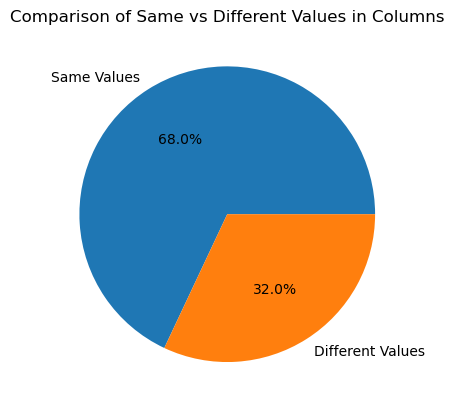

In [ ]:


# Checking cases where the visual road network match the chat gpt results
same_yes = merged_df[(merged_df['Road Networks'] == 'Yes') & (merged_df['Road_network_visual'] == 'Yes')].shape[0]
same_no = merged_df[(merged_df['Road Networks'] == 'No') & (merged_df['Road_network_visual'] == 'No')].shape[0]


same_values_count = same_yes + same_no


total_rows = merged_df.shape[0]
different_values_count = total_rows - same_values_count


counts = [same_values_count, different_values_count]
labels = ['Same Values', 'Different Values']
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Comparison of Same vs Different Values in Visual and chat gpt results')
plt.show()

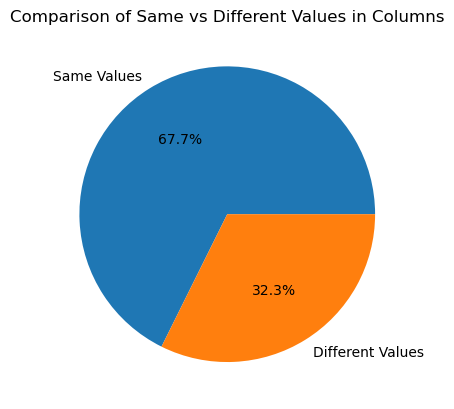

In [ ]:
#checking cases where built are in chat gpt is equivalent to that from visual inspection
same_yes = merged_df[(merged_df['Built Areas'] == 'Yes') & (merged_df['Built_Area_visual'] == 'Yes')].shape[0]
same_no = merged_df[(merged_df['Built Areas'] == 'No') & (merged_df['Built_Area_visual'] == 'No')].shape[0]

same_values_count = same_yes + same_no


total_rows = merged_df.shape[0]
different_values_count = total_rows - same_values_count


counts = [same_values_count, different_values_count]
labels = ['Same Values', 'Different Values']
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Comparison of Same vs Different Values in Columns')
plt.show()

#ChatGPT and data from Nasa and Global settlement
Checking if chatgpt results match results from global settlement and nasa global roads

In [ ]:
geojson_path = "/home/idisc02/Forest_Monitoring/input/New_built_area_filtered_sample.geojson"


gdf = gpd.read_file(geojson_path)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   country                           300 non-null    object  
 1   description_reported              300 non-null    object  
 2   host_name                         300 non-null    object  
 3   planting_date_reported            300 non-null    object  
 4   project_id_reported               300 non-null    object  
 5   site_id_reported                  300 non-null    object  
 6   site_sqkm                         300 non-null    float64 
 7   survival_rate_reported            0 non-null      object  
 8   trees_planted_reported            0 non-null      object  
 9   url                               300 non-null    object  
 10  geometry_reported                 300 non-null    object  
 11  species_planted_reported          0 non-null      

In [ ]:
gdf["created_site_ids"]

In [ ]:
df_gpt= pd.read_csv('/home/idisc02/Downloads/chatgpt_built.csv')
df_gpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Site           57 non-null     object
 1   Road Networks  57 non-null     object
 2   Built Areas    57 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [ ]:

merged_df_gpt = pd.merge(df_gpt,gdf ,left_on='Site', right_on='created_site_ids')

merged_df_gpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Site                              57 non-null     object  
 1   Road Networks                     57 non-null     object  
 2   Built Areas                       57 non-null     object  
 3   country                           57 non-null     object  
 4   description_reported              57 non-null     object  
 5   host_name                         57 non-null     object  
 6   planting_date_reported            57 non-null     object  
 7   project_id_reported               57 non-null     object  
 8   site_id_reported                  57 non-null     object  
 9   site_sqkm                         57 non-null     float64 
 10  survival_rate_reported            0 non-null      object  
 11  trees_planted_reported            0 non-null      object  
 

In [ ]:
merged_df_gpt["Built Areas"]

0      No
1      No
2      No
3     Yes
4      No
5      No
6     Yes
7      No
8      No
9      No
10    Yes
11    Yes
12     No
13     No
14     No
15     No
16     No
17     No
18     No
19    Yes
20    Yes
21     No
22    Yes
23     No
24     No
25     No
26     No
27    Yes
28     No
29     No
30     No
31    Yes
32     No
33     No
34     No
35     No
36     No
37     No
38     No
39     No
40     No
41     No
42     No
43    Yes
44    Yes
45     No
46     No
47     No
48     No
49    Yes
50     No
51    Yes
52     No
53     No
54     No
55     No
56    Yes
Name: Built Areas, dtype: object

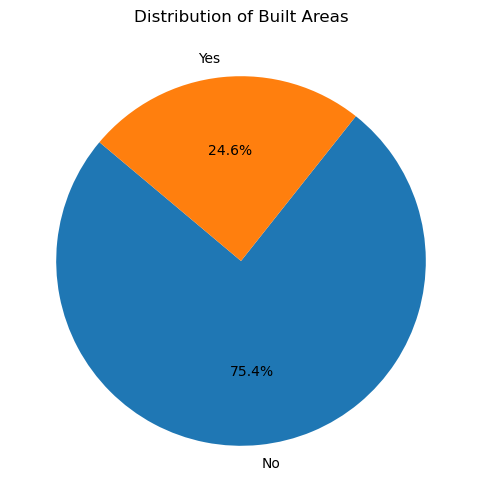

In [ ]:

counts = merged_df_gpt["Built Areas"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Built Areas')
plt.show()